# Homework 5  
# "People like you..." (part 2)
### Assigned Sat, 20 Apr 2019  
### Due Tuesday, May 7 2018 at 11:59 pm

#### Goal:

Building on homework 4, in this (final! short!) homework we're going to do the following: 

1. Perform K-means to group individuals;
2. Speculate on the significance of one grouping created in this way;
3. Reflect upon the implications of what we did in homework 4 and this homework. 

The homework should take you about <b>2.5 hours</b> to do. Special care has been taken to give you detailed examples. You only need adapt the example for the question asked. If you need help, please ask for help early!


## Instructions 
This assignment is to be done <b>on your own</b>, but you can talk about the assignment with your classmates if you get stuck. (Be sure to list the students you spoke with about this assignment in the space provided below.) Feel free to also use [stackoverflow](https://stackoverflow.com/) but please provide citation and link to the specific answer if you do this. You may also visit Will Yumou during his TA office hours or email him with questions.

Provide your code to justify your answer to each question. 

Be sure to rename this homework notebook so that it includes your name. 

### List any students you talked with about this assignment here:
1. [person 1]
2. [person 2]
3. etc.



## Homework Problems 

### Question 0: Stationkeeping Work [0 points]
First, let's load libraries and the data from homework 4:

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from sklearn.cluster import KMeans
%matplotlib notebook

In [2]:
# load data again / you will need to be connected to the internet to get data
features = ['age','workclass', 'fnlwgt', 'education', 'education.num', 'marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss', 'hours.per.week', 'native.country','income']
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None, na_values="?", names=features)

In [3]:
# convert categorical data into numerical data
def preprocess_features(dframe):
    for column in dframe:
        enc = LabelEncoder()
        if(column not in ['age','education.num','fnlwgt','capital.gain','capital.loss','hours.per.week']):
            dframe[column] = enc.fit_transform(dframe[column])
    return dframe

people = preprocess_features(data)

Importing the data points from our previous PCA analysis in homework 4:

In [4]:
# get PCA results from previous homework via pickle file "pca_coordinates.p")
with open ('pca_coordinates.p', 'rb') as fp:
    pca_coordinates = pickle.load(fp)

In [5]:
len(pca_coordinates)

1500

Now we again have a dataframe `people` that has 15 data points for 32,561 people (just like in the previous homework). We also have the PCA results for the last 1500 people from our previous homework in the list `pca_coordinates`. Note that the order of the PCA coordinates is also the order of the last 1500 people in `people`. Plotting our PCA results, we have:

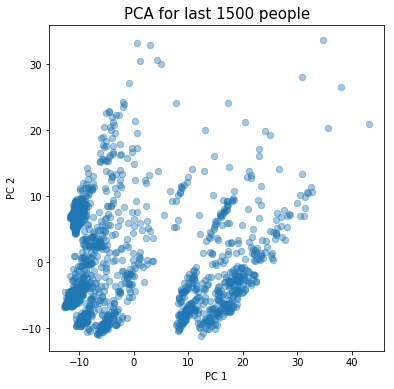

In [6]:
# Plot PCA results from last homework for 
X = []
Y = []
for person in pca_coordinates:
    X.append(person[0])
    Y.append(person[1])
plt.figure(figsize=(6, 6))
plt.title('PCA for last 1500 people', fontsize=15)
plt.xlabel('PC 1', fontsize=10)
plt.ylabel('PC 2', fontsize=10)
plt.scatter(X,Y, alpha = .4, s = 40.)
plt.show()

Also, in case you were curious, here's an image of PCA results performed on the entire dataset `people`, with the datapoint opacity (i.e., alpha) set very low so we can easily see how the data points are distributed.
<img src="pca_all.png">
This gives us a hutch about both how many clusters we might want to look for as well as where these clusters might be located. We're just going to use the last 1500 people for our analysis in question 1.


### question 1 [40 points]  | clustering people
Now we're going to use K-means in an attempt to cluster the people in our dataset `pca_coordinates` without explicitly defining what these clusters will be at the outset (i.e., we're doing unsupervised learning). 

ASIDE: If our discussion of K-means in lab 10a left you scratching your head, a helpful tutorial on K-means with python code here can be found here: https://mubaris.com/2017/10/01/kmeans-clustering-in-python/ . After picking the number of cluster center locations, K-means basically repeats the following two steps over and over: (1) reassign points according to which cluster center they are closest to and (2) readjusts the cluster center based on the mean distance of the data points in each cluster. The K-means procedure is completed once the cluster means and labels stop changing after number of iterations.

#### To see how this is implemented in scikit learn, consider the following example. Let's take `X_example` data from the two columns "age" and "hours worked" in `people` and perform K-means on it.  

In [7]:
# Gather X_example data from people dataframe
# You won't need to use this cell for question 1 as we already have that data in `pca_coordinates` list

# this takes the columns "sex" and "marital.status" and
# combines them into a list of paired values that scikit-learn expects
X_example = list(zip(data["age"][0:500].values, data["hours.per.week"][0:500].values))

In [8]:
# Perform K_means on X_example

# define number of clusters
K = 2 # change K to whatever number of clusters you want
kmeans_model = KMeans(n_clusters=K)

# perform K-means on X_example data
kmeans = kmeans_model.fit(X_example)

# Get cluster labels for each data point in X_example
# where each cluster is denoted by a number. For six
# clusters, the cluster labels = [0, 1, 2, 3, 4, 5].
labels = kmeans.predict(X_example)

# Get cluster center positions for each cluster.
# This will just be the x,y coordinates for X_example.
centers = kmeans.cluster_centers_


We can plot X_example data and the cluster centroids as follows:

In [9]:
print(centers) # will be pairs of x,y coordinates

[[49.40851064 41.8893617 ]
 [27.85283019 37.54716981]]


We can plot the centers of the clusters (denoted by stars) and the X_example data color-coded by cluster like this:

<IPython.core.display.Javascript object>


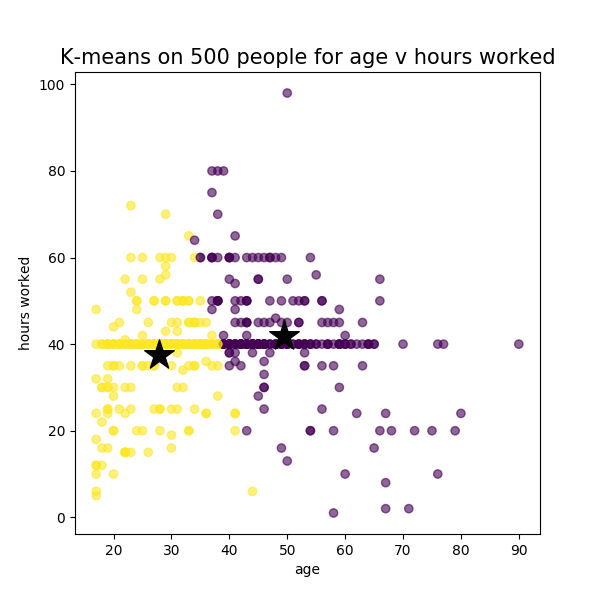

In [10]:
%matplotlib notebook
#plt.scatter(X_example[:,0], X_example[:,1], s=50, c=labels )
plt.figure(figsize=(6, 6))
plt.title('K-means on 500 people for age v hours worked', fontsize=15)
plt.xlabel('age', fontsize=10)
plt.ylabel('hours worked', fontsize=10)

#if you need more than 31 clusters, you'll need to add colors
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'cloudy blue', \
          'dark pastel green','dust','electric lime','fresh green', \
          'light eggplant','nasty green','really light blue','tea',\
          'warm purple','yellowish tan','cement','dark grass green',\
          'dusty teal','grey teal','macaroni and cheese','pinkish tan',\
          'spruce','strong blue','toxic green','windows blue',\
          'blue blue','blue with a hint of purple','bright sea green',\
          'dark green blue']

# USE THIS CODE FOR QUESTION 2 TO PRODUCE "ARROW LABELS"
# uncomment the "##" below to make an arrow label for each data point
##ax = plt.subplot(111) #used to make arrows
##for text in range(0, len(X_example)):
##  ax.annotate(text, xy=(X_example[text]), xycoords='data', xytext=(-30, -30), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# plot data
plt.scatter([x[0] for x in X_example], [y[1] for y in X_example], c=labels, alpha = 0.6)
plt.scatter([c_x[0] for c_x in centers], [c_y[1] for c_y in centers], marker='*', c='#050505', s=500)
plt.show()

What are we to make of this? It's not obvious what two clusters we would expect using the "age" and "hours worked per week" data for 500 people. Since we picked 2 clusters, k-means effectively clustered our data into two halves. But you can easily change the number of clusters `K` and rerun k-means to see what different clusters you get. The stars, as already mentioned, denote the location of the centers of the clusters. 

#### Your turn! Using the example above as a guide, perform K-means on our `pca_coordinates` data. (Hint: you'll use the list  `pca_coordinates` in place of `X_example` list above.)  Pick how many clusters `K` to use by examining plots "PCA for last 1500 people" and the "2 component PCA for Similarity" plots above. (Going off the PCA plots above, likely anywhere between 5 and 8 clusters might give good clusters.) 

In [ ]:
# Your code here




## question 2 [30 points] | Writing fictions with data
You've performed K-means on a PCA plot of the last 1500 people. Now it's time to use this data to make claims about the world.

#### Imagine you're working in an advertising firm. Pick one cluster and examine what all the people around cluster have in common. They probably won't share just one attribute, but several similar features. Note which cluster you're looking at and *produce a story* about what life is like for these people. Be creative and don't be afraid to make inferences that are not contained by the data, as long as the data doesn't contradict your story.  Are they old? Young? How much do they work? Men? Women? Married? *Use evidence from the data to support your story.* [max 250 words, min 150 words]

If you used the example code above, the coordinates of the cluster centers are stored in the list `centers`. To figure out what data points (i.e., people) are around a cluster, uncomment and use the code for "ARROW LABELS" above. This will attach a label to each data point. Once you have labels, you can zoom in on the section around the cluster to more easily read the arrow labels. 

Because we took the last 1500 people to produce our PCA coordinates and because our data set has 32561 people (with each row being one person), datapoint/person "1" will be the 31061st row in our dataframe `people`. Likewise datapoint/person "2" will be the 31062nd person, etc. The datapoint/person "1500" will be the last row in the data set. You can use the usual panda tricks on the dataframe `people` to see what these people have in common, and you can use this to infer/imagine what the cluster of people represents.

Provide your story of the people in the cluster your choosing below:

Put your story here...

.

.

.

.

.

.


## question 3 [30 points] | The Perils of Working with Social Data

You've now effectively done a mini-version of what Amazon or Facebook or even Cambridge Analytica does <b>in the sense</b> that you've taken some data about people and invented a narrative about what links them together with some math. You took a data set of people, performed PCA on them, and then clustered the results to group people. The math you used was different from what the aforementioned companies use, but the move to imagine narratives using data to differentiate people (and perhaps treat them differently as a result) is very similar. 

#### Reflect on the analysis we performed (in both homework 4 and 5). List *7 reasons* (with explanations) why the narrative you produced in question 2 cannot be trusted and/or is likely false. 

Potential things you may want to discuss may include but not be limited to (1) how the data was collected, (2) how categorical variables were transformed into numerical values, (3) how the collection of features are the wrong features to examine, (4) how the assumptions of PCA to treat each variable equally is a bad assumption (and why), (5) how the choice of clustering people with k-means doesn't handle "edge case" people very well, and/or (6) how the data features such as "race" or "relationship" or "marriage status" or even "hours worked per week" are flawed categories. There is no one set of reasons you must provide; rather the point is to provide a compelling argument for why such analyses like the one we performed are more likely than not to go catastrophically awry.   

Provide your answer below:

Write your reasons here ....

.

.

.

.